### **Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos**

 **Angeles Arista Huerta** */  SEPTIEMBRE 2022*

*Entrega - Caso de negocios, módulo 1 - Estadística*

###### **DESCRIPCIÓN DEL CASO**
###### *Usted fue contratado como científico de datos en una importante empresa de fondos de inversión en el departamento de análisis financiero. La firma lleva varios años realizando análisis financieros y previsiones financieras. Le contrataron para que ideara enfoques alternativos para realizar análisis descriptivos con el fin de encontrar mejores alternativas futuras para los métodos de previsión.*

###### *Usted tiene que analizar los estados financieros trimestrales históricos de todas las firmas públicas estadounidenses que cotizan en la Bolsa de Nueva York y NASDAQ. Recibirá este conjunto de datos en formato .csv.*

---

#### *Procesamiento del dataset*

In [574]:
# importar librerias
import numpy as np              #Algebra lieal
import pandas as pd             #Procesamiento de datos
import seaborn as sns           #Graficas/Visualizacion
import matplotlib.pyplot as plt #Graficas/Visualizacion

In [575]:
# acceso a directorio
%cd "c:\Users\angix\Downloads\Estadistica"
#%ls 

c:\Users\angix\Downloads\Estadistica


###### Lectura de los archivos csv

In [576]:
# Lectura csv de firms
firms = pd.read_csv("c:\\Users\\angix\\Downloads\\Statistics\\usfirms2022.csv")
#firms.head(3)

In [577]:
# Lectura csv de us
us = pd.read_csv("c:\\Users\\angix\\Downloads\\Statistics\\us2022q2a.csv")
#us.head(3)

In [578]:
# Configuración de la visualización de datos a 3 decimales
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

###### Descripción de los datos

In [579]:
firms.info()
firms.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticker                       3608 non-null   object
 1   Name                         3608 non-null   object
 2   N                            3608 non-null   int64 
 3   Class                        3608 non-null   object
 4   Country
of Origin            3608 non-null   object
 5   Type of Asset                3608 non-null   object
 6   Sector NAICS
level 1         3608 non-null   object
 7   Exchange / Src               3608 non-null   object
 8   Sector
Economatica           3608 non-null   object
 9   Sector NAICS
last available  3608 non-null   object
 10  partind                      3608 non-null   object
dtypes: int64(1), object(10)
memory usage: 310.2+ KB


,N
count,3608.000
mean,1804.500
std,1041.684
min,1.000
25%,902.750
50%,1804.500
75%,2706.250
max,3608.000


In [580]:
us.info()
us.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324447 entries, 0 to 324446
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               324446 non-null  object 
 1   q                  324446 non-null  object 
 2   revenue            158614 non-null  float64
 3   cogs               158309 non-null  float64
 4   sgae               158309 non-null  float64
 5   otheropexp         158311 non-null  float64
 6   extraincome        158613 non-null  float64
 7   finexp             158614 non-null  float64
 8   incometax          158614 non-null  float64
 9   totalassets        159808 non-null  float64
 10  totalliabilities   159808 non-null  float64
 11  shortdebt          129677 non-null  float64
 12  longdebt           159595 non-null  float64
 13  stockholderequity  159740 non-null  float64
 14  adjprice           159154 non-null  float64
 15  originalprice      159234 non-null  float64
 16  sh

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
count,158614.000,158309.000,158309.000,158311.000,158613.000,158614.000,158614.000,159808.000,159808.000,129677.000,159595.000,159740.000,159154.000,159234.000,157822.000,159814.000,324446.000,324446.000
mean,1452992.639,801464.718,420278.553,40350.486,-14613.885,20418.493,41498.806,16670755.635,13152678.383,428951.751,2959733.848,3518161.935,3887.274,142.157,201184.385,7.448,2010.755,2.478
std,5403175.803,3747464.594,1740520.321,767107.107,548720.221,112823.183,331055.653,102736719.101,91956192.276,4603231.586,14951964.609,14174529.059,352358.129,4835.897,692298.844,3.346,6.499,1.118
min,-4788351.000,-4460800.000,-3373000.000,-6967000.000,-41491000.000,-3439000.000,-35645000.000,0.000,0.000,-15006.000,0.000,-90520000.000,0.012,0.003,0.000,0.000,2000.000,1.000
25%,33798.500,228.000,9332.000,0.000,-2140.000,0.000,0.000,366402.500,140720.750,0.000,7000.000,123710.250,9.910,11.160,25080.964,3.000,2005.000,1.000
50%,205175.345,43823.000,56367.000,0.000,0.000,795.000,2493.000,1711736.000,989997.500,6452.000,255000.000,568157.000,20.859,25.800,55895.352,6.000,2011.000,2.000
75%,860000.000,370718.000,217920.000,33.000,697.572,13000.000,20184.750,6618525.250,4359461.750,81827.000,1503723.500,1975248.250,42.290,49.040,144209.075,9.000,2016.000,3.000
max,152871008.000,115522000.000,131662000.000,69018000.000,129197000.000,6955000.000,39186000.000,3954687000.000,3668788000.000,300279000.000,511653000.000,508141000.000,70117187.500,528921.000,98214051.000,12.000,2022.000,4.000


**SE COMIENZA HACIENDO LA LECTURA DE LOS ARCHIVOS CSV PARA TENER LA DATASET, SE DESPLIEGA UNA DESCRIPCIÓN DE LOS DATOS, OBTENIENDO LAS VARIABLES QUE CONFORMAN EL DATASET Y EL TIPO DE DATO QUE UTILIZA CADA VARIABLE.**

---

#### *Limpieza y modificación de datos*

1. Verificar que no existan datos nulos, duplicados

2. Si no impacta en la dataset, eliminarlos o modificarlos

In [581]:
# Datos nulos en el csv
us.isna().sum() 
us.isnull().sum()

firm                      1
q                         1
revenue              165833
cogs                 166138
sgae                 166138
otheropexp           166136
extraincome          165834
finexp               165833
incometax            165833
totalassets          164639
totalliabilities     164639
shortdebt            194770
longdebt             164852
stockholderequity    164707
adjprice             165293
originalprice        165213
sharesoutstanding    166625
fiscalmonth          164633
year                      1
cto                       1
dtype: int64

In [582]:
# Eliminar datos nulos
us = us.drop(index=324446,axis=0) #Eliminar fila con datos nulos

In [583]:
# Datos duplicados en el csv
us[us.duplicated()]

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto


**SE VERIFICA QUE LA DATASER TIENE DATOS NULOS; AL SER UNA GRAN CANTIDAD DE VALORES NULOS NO ES IDEAL BORRARLOS, POR LO QUE NO SE HACE UNA MODIFICACIÓN SIGNIFICATIVA.**

---

#### *Analisis del dataset*

***Preguntas Generales***

>###### Por industria, ¿cuál es la composición de las empresas públicas estadounidenses en términos de tamaño de la empresa, rendimiento de las ventas y rentabilidad?
###### **RESPUESTA.**

>###### ¿Por qué algunas empresas son más rentables que otras? ¿Qué factores/variables de los estados financieros están relacionados con los rendimientos de las acciones?
###### **RESPUESTA.**

---

#### *Estadistica descriptiva*

***Preguntas Especificas***

Considerando el trimestre financiero más reciente del conjunto de datos:

>###### Mostrar cuántas empresas por industria hay en la muestra

In [584]:
# Merge
US_Firms = firms.merge(us, left_on='Ticker', right_on='firm')
US_Firms = US_Firms.drop(["N", 
                          "Class", 
                          "Country\nof Origin", 
                          "Type of Asset", 
                          "Exchange / Src", 
                          "Sector\nEconomatica", 
                          "Sector NAICS\nlast available", 
                          "partind"], 
                         axis = 1)
US_Firms.head(0)

,Ticker,Name,Sector NAICS\nlevel 1,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto


In [585]:
US_Firms['q'] = pd.PeriodIndex(US_Firms['q'],freq = "q")
US_Firms.set_index(['firm','q'],inplace=True)

In [586]:
US_Firms

Ticker                   Name Sector NAICS\nlevel 1    revenue  \
firm q                                                                       
FLWS 2000Q1   FLWS  1 800 Flowers Com Inc          Retail Trade  85045.000   
     2000Q2   FLWS  1 800 Flowers Com Inc          Retail Trade 123288.000   
     2000Q3   FLWS  1 800 Flowers Com Inc          Retail Trade  72516.000   
     2000Q4   FLWS  1 800 Flowers Com Inc          Retail Trade 134243.000   
     2001Q1   FLWS  1 800 Flowers Com Inc          Retail Trade 103221.000   
...            ...                    ...                   ...        ...   
ZNGA 2021Q2   ZNGA              Zynga Inc           Information 720000.000   
     2021Q3   ZNGA              Zynga Inc           Information 704700.000   
     2021Q4   ZNGA              Zynga Inc           Information 695500.000   
     2022Q1   ZNGA              Zynga Inc           Information 691200.000   
     2022Q2   ZNGA              Zynga Inc           Information        NaN   

                  cogs       sgae  otheropexp  extraincome    finexp  \
firm q                                                                 
FLWS 2000Q1  54143.000  52146.000       0.000      111.000 -1600.000   
     2000Q2  75607.000  63201.000       0.000       27.000 -2164.000   
     2000Q3  45091.000  51590.000       0.000       88.000 -1576.000   
     2000Q4  79099.000  67206.000       0.000      335.000 -1191.000   
     2001Q1  64020.000  48856.000       0.000       76.000 -1069.000   
...                ...        ...         ...          ...       ...   
ZNGA 2021Q2 253300.000 391900.000       0.000    -9100.000 13000.000   
     2021Q3 240800.000 409400.000   66800.000     -600.000 13200.000   
     2021Q4 260100.000 436600.000       0.000   -10400.000 13600.000   
     2022Q1 252200.000 424000.000       0.000   -15700.000  2200.000   
     2022Q2        NaN        NaN         NaN          NaN       NaN   

             incometax  totalassets  totalliabilities  shortdebt    longdebt  \
firm q                                                                         
FLWS 2000Q1   -268.000   248461.000         76657.000   4380.000    8869.000   
     2000Q2   -419.000   224641.000         65723.000   1839.000    9441.000   
     2000Q3      0.000   211449.000         75163.000   7654.000   10916.000   
     2000Q4      0.000   213983.000         88231.000   2157.000   10452.000   
     2001Q1      0.000   200400.000         83160.000   4777.000   12318.000   
...                ...          ...               ...        ...         ...   
ZNGA 2021Q2  24900.000  6132200.000       3111600.000  17700.000 1457000.000   
     2021Q3  15600.000  6067700.000       3060700.000  17600.000 1467600.000   
     2021Q4  42100.000  6358900.000       3247000.000  17100.000 1477200.000   
     2022Q1  21600.000  5860000.000       2953900.000  17900.000 1673700.000   
     2022Q2        NaN          NaN               NaN        NaN         NaN   

             stockholderequity  adjprice  originalprice  sharesoutstanding  \
firm q                                                                       
FLWS 2000Q1         171804.000     7.125          7.125          64097.913   
     2000Q2         158918.000     5.125          5.125          64170.913   
     2000Q3         136286.000     4.984          4.984          64185.913   
     2000Q4         125752.000     4.125          4.125          64187.163   
     2001Q1         117240.000     8.000          8.000          64187.163   
...                        ...       ...            ...                ...   
ZNGA 2021Q2        3020600.000    10.630         10.630        1088762.805   
     2021Q3        3007000.000     7.530          7.530        1091890.649   
     2021Q4        3111900.000     6.400          6.400        1120181.490   
     2022Q1        2906100.000     9.240          9.240        1132408.337   
     2022Q2                NaN     8.180          8.180        1137273.677   

    

**PARA OBTENER EL VALOR DE MERCADO Y EL VALOR CONTABLE DE LA EMPRESA, ES NECESARIO EMPLEAR LOS SIGUIENTES CALCULOS:**

##### *Firm Size Measures:*
* *Book value of the firm* = (TotalAssets - TotalLiabilities)
* *Market value* = (OriginalPrice * SharesOutStanding)              Precio del stock historico

##### *Profit Margin Measures:*
* *Operating Profit* = (Revenue - Cogs - Sgae) 
###### ---//Cogst-Costos Variables //Sgae-Costos fijos
* *Operating Profit Margin (OPM)* = (Ebit / Revenue)             
* *Profit margin* = (NetIncome / revenue)               
* *Net Income* = (Ebit - Incometax - Finexp)       
###### ---//Incometax-Impuesto sobre la renta //Finexp-Gastos financieros                

In [587]:
# Calculo de valor de mercado y valor contable
US_Firms['Book Value of the Firms'] = US_Firms['totalassets'] - US_Firms['totalliabilities']
US_Firms['Market Value'] = US_Firms['originalprice'] * US_Firms['sharesoutstanding']
US_Firms.head(0)

,,Ticker,Name,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value
firm,q,,,,,,,,,,,,,,,,,,,,,,,


In [588]:
# Calculos Profit Margin Measures
US_Firms['Operating Profit'] = US_Firms['revenue'] - US_Firms['cogs'] - US_Firms['sgae'] - US_Firms['otheropexp']
US_Firms['OPM'] = US_Firms['Operating Profit'] / US_Firms['revenue']
US_Firms['Net Income'] = US_Firms['Operating Profit'] - US_Firms['incometax'] - US_Firms['finexp']
US_Firms['Profit Margin'] = US_Firms['Net Income'] / US_Firms['revenue']
US_Firms.head(0)

,,Ticker,Name,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin
firm,q,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [589]:
# Divir empresas por industria
comercial = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Wholesale Trade") | (US_Firms['Sector NAICS\nlevel 1'] == "Retail Trade")]
services = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Accommodation and Food Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Administrative and Support and Waste Managment and Remedation Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Arts, Entertainment, and Recreation") | (US_Firms['Sector NAICS\nlevel 1'] == "Educational Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Health Care and Social Assistance") | (US_Firms['Sector NAICS\nlevel 1'] == "Information") | (US_Firms['Sector NAICS\nlevel 1'] == "Other Services (except Public Administration)") | (US_Firms['Sector NAICS\nlevel 1'] == "Profession, Scientific and Technical Services") | (US_Firms['Sector NAICS\nlevel 1'] == "Transportation and Warehousing")]
financial = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Finance and Insurance") | (US_Firms['Sector NAICS\nlevel 1'] == "Real Estate and Rental and Leasing")]
manufacturing = US_Firms.loc[(US_Firms['Sector NAICS\nlevel 1'] == "Manufacturing")]

In [590]:
# Conteo por industrias
print('     Industria          #')

print('Commercial :         ', comercial.groupby(["firm"]).sum().shape)
print('Services :           ', services.groupby(["firm"]).sum().shape)
print('Financial Services : ', financial.groupby(["firm"]).sum().shape)
print('Manufacturing :     ',  manufacturing.groupby(["firm"]).sum().shape)

     Industria          #
Commercial :          (231, 24)
Services :            (514, 24)
Financial Services :  (769, 24)
Manufacturing :      (1565, 24)


**SE PUEDE OBSERVAR QUE LA INDUSTRIA CON MENOR CANTIDAD DE EMPRESAS ES LA** ***INDUSTRIA COMERCIAL*** **CON UNA CANTIDAD DE** ***231***

**Y LA QUE POSEE MÁS EMPRESAS ES LA** ***INDUSTRIA DE MANUFACTURA*** **CON UN TOTAL DE** ***1565***

---

 Para cada sector (y para todos los sectores), 
> ###### ¿Qué puede decir sobre el tamaño típico de la empresa en términos de valor de mercado y valor contable? 

> ###### ¿Cuánto cambian estas variables dentro de cada industria? 

> ###### ¿Cómo se distribuye el tamaño de la empresa (en valor de mercado)?
**RESPUESTA.**

**SE OBTIENE INFORMACIÓN DE LA MEDIANA YA QUE AL POSEER DATOS NULOS, EL DATASET SE ENCUNTRA MUY SESGADO Y LA MEDIA NO PROPORCIONA INFORMACIÓN NECESARIA.**


In [591]:
# Para todas las industrias en función del valor de mercado y valor contable
print('                      ','Valor de mercado', ' Valor contable')

print('Todas las industrias : ',
                            round(US_Firms["Market Value"].median(),3),
                            '     ',
                            round(US_Firms["Book Value of the Firms"].median(),3))

                       Valor de mercado  Valor contable
Todas las industrias :  1570573.461       567545.0


**PARA TODAS LAS INDUSTRIAS SE OBTIENE UN TAMAÑO TÍPICO DE 1.570 MILLONES DE DOLARES BASADO EN EL VALOR DE MERCAD, BASANDONOS EN EL VALOR CONTABLE SE OBTIENE UN TAMAÑO TÍPICO DE 567 MILES DE DOLARES**

Text(0.5, 1.0, 'All Industrias Book Value for Commercial')

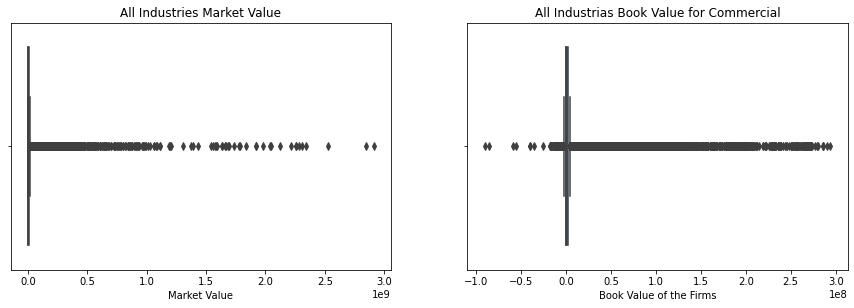

In [592]:
# Representación para todas las industrias del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Market Value",
            data=US_Firms, 
            ax=ax1).set_title("All Industries Market Value")

sns.boxplot(x="Book Value of the Firms",
            data=US_Firms, 
            ax=ax2).set_title("All Industrias Book Value for Commercial")

**DE ACUERDO AL GRAFICO SE PUEDE OBSERVAR QUE EL VALOR DE MERCADO NO TIENE UNA DISTRIBUCIÓN NORMAL, TENIENDO UNA TENDENCIA DE VALORES ENTRE 0-1 MILLONES DE DOLARES. DE IGUAL MANERA ESTE GRAFICO NOS PERMITE VER QUE HAY UNA GRAN CANTIDAD DE VALORES EN 0**

**A DIFERENCIA DEL VALOR DE MERCADO, EL VALOR CONTABLE MUESTRA UNA DISTRIBUCIÓN DISPERSA, AL MOSTRAR VALORES NEGATIVOS Y LA TENDENCIA DE VALORES ENTRE 0-2 MILES DE DOLARES. ASÍ MISMO EL GRAFICO MUESTRA UNA GRAN CANTIDAD DE VALORES EN 0**

In [593]:
# Para cada industria valor de mercado y valor contable
print('Industria            ','Valor de mercado', ' Valor contable')

print('Commercial :          ', round(comercial["Market Value"].median(),3),
                            '     ',
                            round(comercial["Book Value of the Firms"].median(),3))
print('Services :            ', round(services["Market Value"].median(),3),
                            '     ',
                            round(services["Book Value of the Firms"].median(),3))
print('Financial Services :  ', round(financial["Market Value"].median(),3),
                            '     ',
                            round(financial["Book Value of the Firms"].median(),3))
print('Manufacturing :       ',  round(manufacturing["Market Value"].median(),3),
                            '      ',
                            round(manufacturing["Book Value of the Firms"].median(),3))

Industria             Valor de mercado  Valor contable
Commercial :           2083817.971       723936.0
Services :             2184463.519       544419.0
Financial Services :   1563695.938       893833.0
Manufacturing :        1190025.11        363070.5


**PARA LA** ***INDUSTRIA COMERCIAL*** **SE TIENE UN TAMAÑO DE EMPRESA DE 2.083 MILLONES DE DOLARES AL BASARSE EN SU VALOR DE MERCADO Y UN TAMAÑO DE 723 MILES DE DOLARES DE SU VALOR CONTABLE DE**

**EN EL SECTOR DE** ***SERVICIOS*** **SE OBSERVA UN VALOR DE MERCADO DE 2.184 MILLONES DE DOLARES PARA SU TAMAÑO DE EMPRESA Y UNA DIFERENCIA EN SU VALOR CONTABLE CON UNA CANTIDAD DE 544 MILES DE DOLARES.**

**EN LA** ***INDUSTRIA FINANCIERA*** **EL TAMAÑO DE EMPRESA BASADO EN SU VALOR DE MERCADO ES DE 1.563 MILLONES DE DOLARES, AL BASARNOS EN SU VALOR CONTABLE EL TAMAÑO DE EMPRESA ES DE 893 MILES DE DOLARES.**

**PARA LA** ***INDUSTRIA DE MANUFACTURA*** **MEDIANTE EL VALOR DE MERCADO SE TIENE UN TAMAÑO DE EMPRESA DE 1.190 MILLONES DE DOLARES, MEDIANTE EL VALOR CONTABLE EL TAMAÑO DE EMPRESA ES DE 363 MILES DE DOLARES.**

Text(0.5, 1.0, 'Book Value for Commercial')

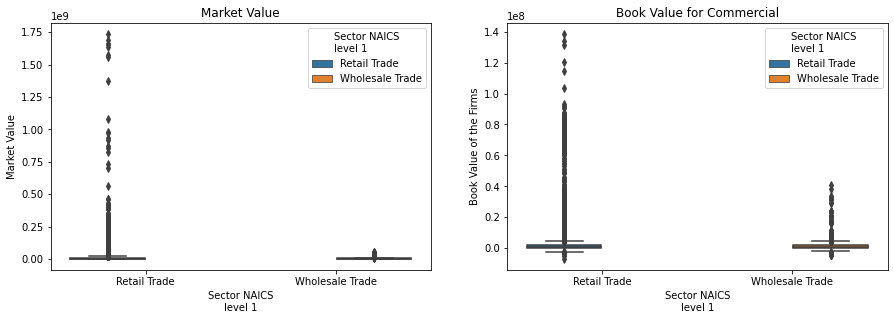

In [594]:
# Representación industria comercial del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Market Value",
            data=comercial, 
            hue="Sector NAICS\nlevel 1",
            ax=ax1).set_title("Market Value")

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Book Value of the Firms",
            data=comercial, 
            hue="Sector NAICS\nlevel 1",
            ax=ax2).set_title("Book Value for Commercial")

Text(0.5, 1.0, 'Book Value for Services')

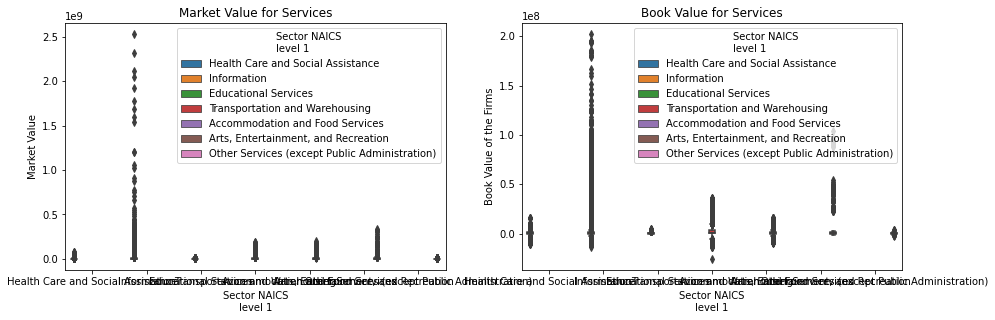

In [595]:
# Representación industria de servicios del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Market Value",
            data=services, 
            hue="Sector NAICS\nlevel 1",
            ax=ax1).set_title("Market Value for Services")

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Book Value of the Firms",
            data=services, 
            hue="Sector NAICS\nlevel 1",
            ax=ax2).set_title("Book Value for Services")

Text(0.5, 1.0, 'Book Value for Financial Services')

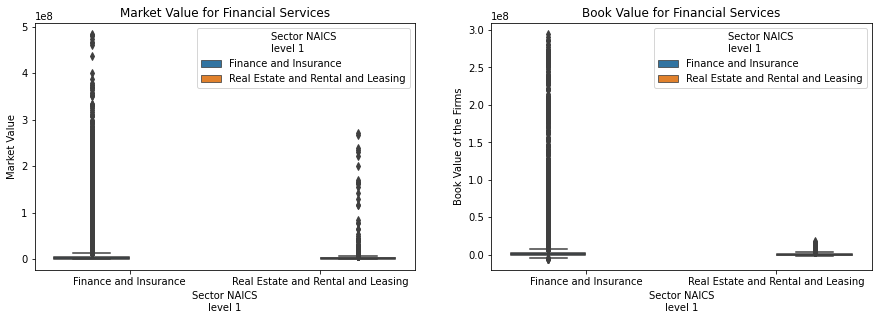

In [596]:
# Representación industria de servicios financieros del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Market Value",
            data=financial, 
            hue="Sector NAICS\nlevel 1",
            ax=ax1).set_title("Market Value for Financial Services")

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Book Value of the Firms",
            data=financial, 
            hue="Sector NAICS\nlevel 1",
            ax=ax2).set_title("Book Value for Financial Services")

Text(0.5, 1.0, 'Book Value for Manufacturing')

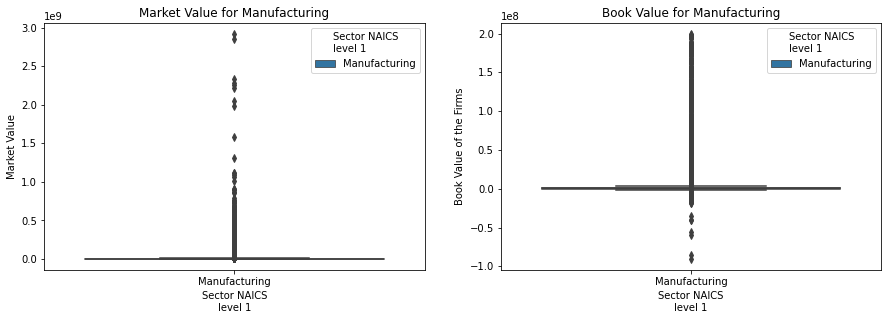

In [597]:
# Representación industria de manufactura del valor de mercado y valor contable
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Market Value",
            data=manufacturing, 
            hue="Sector NAICS\nlevel 1",
            ax=ax1).set_title("Market Value for Manufacturing")

sns.boxplot(x="Sector NAICS\nlevel 1",
            y="Book Value of the Firms",
            data=manufacturing, 
            hue="Sector NAICS\nlevel 1",
            ax=ax2).set_title("Book Value for Manufacturing")

---

Para cada sector (y para todos los sectores)
>###### ¿Qué puede decir sobre el margen de beneficio de las empresas? 
>###### a) estadísticas descriptivas del margen de beneficios 
>###### b) gráfico(s) para ilustrar cómo cambia el margen de beneficios entre las industrias.

count   157824.000
mean           NaN
std            NaN
min           -inf
25%         -0.030
50%          0.053
75%          0.142
max            inf
Name: Profit Margin, dtype: float64
All Industries Profit Margin :  0.0531


<AxesSubplot:xlabel='firm'>

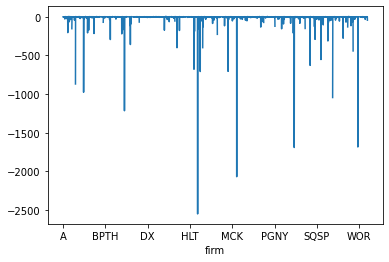

In [689]:
# Analisis descriptivo
print(US_Firms['Profit Margin'].describe())
print('All Industries Profit Margin : ', round(US_Firms['Profit Margin'].median(),4))
US_Firms["Profit Margin"].groupby(["firm"]).last().plot()

Comercial Profit Margin :  0.0286


<AxesSubplot:xlabel='firm'>

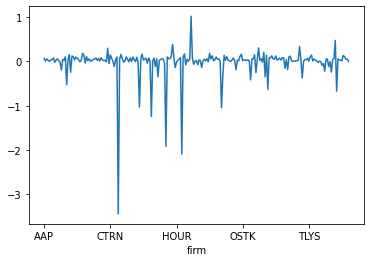

In [690]:
print('Comercial Profit Margin : ', round(comercial['Profit Margin'].median(),4))
comercial["Profit Margin"].groupby(["firm"]).last().plot()

Services Profit Margin :  0.0406


<AxesSubplot:xlabel='firm'>

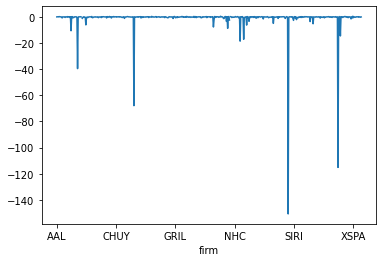

In [691]:
print('Services Profit Margin : ', round(services['Profit Margin'].median(),4))
services["Profit Margin"].groupby(["firm"]).last().plot()

Financial Services Profit Margin :  0.2989


<AxesSubplot:xlabel='firm'>

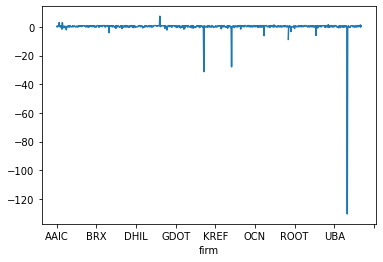

In [692]:
print('Financial Services Profit Margin : ', round(financial['Profit Margin'].median(),4))
financial["Profit Margin"].groupby(["firm"]).last().plot()

Manufacturing Profit Margin :  0.0298


<AxesSubplot:xlabel='firm'>

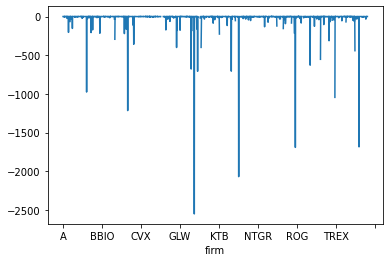

In [693]:
print('Manufacturing Profit Margin : ', round(manufacturing['Profit Margin'].median(),4))
manufacturing["Profit Margin"].groupby(["firm"]).last().plot()

**EL MARGEN DE BENEFICIO PARA TODAS LAS INDUSTRIAS ES DEL** ***5%*** **DE BENEFICIO POR VENTA**

- **EL MARGEN DE BENEFICIO PARA LA** ***INDUSTRIA COMERCIAL*** **ES DEL** ***2.87%*** **DE BENEFICIO POR VENTA**
- **EL MARGEN DE BENEFICIO PARA LA** ***INDUSTRIA DE SERVICIOS*** **ES DEL** ***4%*** **DE BENEFICIO POR VENTA**
- **EL MARGEN DE BENEFICIO PARA LA** ***INDUSTRIA FINANCIERA*** **ES DEL** ***29%*** **DE BENEFICIO POR VENTA**
- **EL MARGEN DE BENEFICIO PARA LA** ***INDUSTRIA DE MANUFACTURA*** **ES DEL** ***2.98%*** **DE BENEFICIO POR VENTA**

---

In [665]:
B_Firms = US_Firms.groupby(["firm"]).last()
B_Firms = B_Firms[['Name','Book Value of the Firms','Market Value']]

>###### ¿Cuáles son las 10 empresas estadounidenses más grandes en términos de valor de mercado y a qué distancia están del tamaño típico de una empresa estadounidense?



In [697]:
print('Valor de Mercado : ', round(US_Firms['Market Value'].median(),3))

Valor de Mercado :  1570573.461


In [668]:
top = B_Firms.sort_values('Market Value', ascending=False)
top[['Name','Market Value']].head(10)

,Name,Market Value
firm,,
AAPL,Apple Inc,2212837946.320
MSFT,Microsoft Corp,1920840080.062
GOOGL,Alphabet Inc,1435042441.951
AMZN,"Amazon.Com, Inc",1080624045.740
TSLA,"Tesla, Inc",697669803.694
UNH,Unitedhealth Group Inc,481873080.449
JNJ,Johnson & Johnson,467100134.228
META,"Meta Platforms, Inc",436394646.154
NVDA,Nvidia Corp,378975000.000


**DE ACUERDO A LA MEDIANA DEL VALOR DE MERCADO QUE ES DE 1.570 MILLONES DE DOLARES, LAS 10 EMPRESAS MÁS GRANDES SOBREPASAN EL TAMAÑO TÍPICO DE UNA EMPRESA ESTADOUNIDENSE**

>###### ¿Cuáles son las 10 empresas estadounidenses más importantes en términos de valor contable y a qué distancia están del tamaño típico de una empresa estadounidense?

In [699]:
print('Valor Contable : ', round(US_Firms['Book Value of the Firms'].median(),3))

Valor Contable :  567545.0


In [669]:
top = B_Firms.sort_values('Book Value of the Firms', ascending=False)
top[['Name','Book Value of the Firms']].head(10)

,Name,Book Value of the Firms
firm,,
JPM,Jpmorgan Chase & Co,286143000.000
BAC,Bank Of America Corp,269118000.000
GOOGL,Alphabet Inc,255419000.000
C,Citigroup Inc,199626000.000
XOM,Exxon Mobil Corp,184508000.000
WFC,Wells Fargo & Company,179793000.000
MSFT,Microsoft Corp,166542000.000
CVX,Chevron Corp,154562000.000
T,AT&T Inc,135307000.000


**DE ACUERDO A LA MEDIANA DEL VALOR CONTABLE QUE ES DE 567 MILES DE DOLARES, LAS 10 EMPRESAS MÁS GRANDES SOBREPASAN EL TAMAÑO TÍPICO DE UNA EMPRESA ESTADOUNIDENSE**

---

#### *Modelado estadistico*

Considerando todo el historial de datos financieros de todas las empresas:

>###### ¿Cómo se puede medir la rentabilidad de las empresas que se puede utilizar para comparar el rendimiento entre empresas de diferentes tamaños? Seleccionar y justificar al menos 3 medidas y mostrar estadísticas descriptivas
 **RESPUESTA.**

>###### Calcular y explicar las ganancias por acción deflactadas por precio.
**RESPUESTA.**

Utilizando su subconjunto de empresas que pertenecen a su sector
> ###### ¿qué factores (variables) podrían estar relacionados con la rentabilidad anual de las acciones en un trimestre en el futuro? 
Seleccione al menos 3 factores y explique brevemente.
> ###### ¿por qué cree que podrían estar relacionados con la rentabilidad de las acciones?.
**RESPUESTA.**

In [638]:
US_Firms["r"] = np.log(US_Firms["adjprice"]) - np.log(US_Firms["adjprice"].shift(4))
US_Firms[["adjprice","r"]]

adjprice      r
firm q                      
FLWS 2000Q1     7.125    NaN
     2000Q2     5.125    NaN
     2000Q3     4.984    NaN
     2000Q4     4.125    NaN
     2001Q1     8.000  0.116
...               ...    ...
ZNGA 2021Q2    10.630  0.108
     2021Q3     7.530 -0.192
     2021Q4     6.400 -0.433
     2022Q1     9.240 -0.100
     2022Q2     8.180 -0.262

[323816 rows x 2 columns]

In [639]:
US_Firms["F1_ret"] = US_Firms["r"].shift(-1)
US_Firms[["r","F1_ret"]]

r  F1_ret
firm q                    
FLWS 2000Q1    NaN     NaN
     2000Q2    NaN     NaN
     2000Q3    NaN     NaN
     2000Q4    NaN   0.116
     2001Q1  0.116   1.063
...            ...     ...
ZNGA 2021Q2  0.108  -0.192
     2021Q3 -0.192  -0.433
     2021Q4 -0.433  -0.100
     2022Q1 -0.100  -0.262
     2022Q2 -0.262     NaN

[323816 rows x 2 columns]

In [640]:
#Earning per share:
US_Firms["EPSP"] = US_Firms['Net Income'] / US_Firms["sharesoutstanding"]

#Sales annual growth
US_Firms["Sales Annual G"] = (US_Firms["revenue"] / (US_Firms["revenue"].shift(-4)))-1

#Book to market ratio
US_Firms["Book to Market Ratio"] = (US_Firms["totalassets"] - US_Firms["totalliabilities"]) / (US_Firms["originalprice"] * US_Firms["sharesoutstanding"])

#To classify by size
US_Firms.sort_values("Market Value").groupby("q")
US_Firms["size"] = pd.cut(US_Firms["Market Value"], bins=3, labels = ["small","medium","big"])

US_Firms.head(0)

,,Ticker,Name,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Book Value of the Firms,Market Value,Operating Profit,OPM,Net Income,Profit Margin,r,F1_ret,EPSP,Sales Annual G,Book to Market Ratio,size
firm,q,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


**PARA CONOCER LAS FIRMAS CON UNA MAYOR RENTABILIDAD, LAS VARIABLES QUE SE PUEDEN TOMAR SON :**
- **EARNING PER SHARE - INDICA EL FACTOR DE RENTABILIDAD DE UNA EMPRESA**
- **SALES ANNUAL GROWTH - REPRESENTA EL CAMBIO EN LAS VENTAS CON RESPECTO A UN PERIODO ANTERIOR, ES UN PARAMETRO ESENCIAL PARA CONOCER EL CRECIMIENTO FINANCIERO DE LA EMPRESA**
- **BOOK TO MARKET RATIO - DETERMINA EL VALOR DE MERCADO DE UNA EMPRESA EN RELACIÓN CON SU VALOR REAL**


>###### Realice histogramas para cada factor/variable e interpretarlos

<AxesSubplot:xlabel='F1_ret', ylabel='Count'>

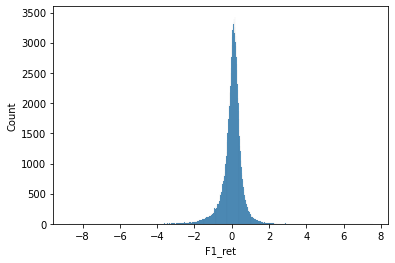

In [641]:
sns.histplot(x="F1_ret",data=US_Firms)

**RESPUESTA.**

<AxesSubplot:xlabel='EPSP', ylabel='Density'>

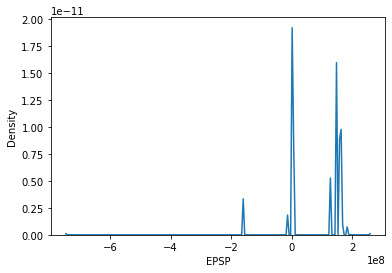

In [642]:
sns.kdeplot(x="EPSP",data=US_Firms)


**RESPUESTA.**

<AxesSubplot:xlabel='Sales Annual G', ylabel='Density'>

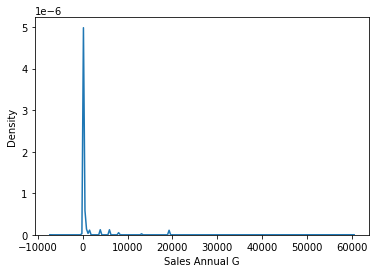

In [643]:
sns.kdeplot(x="Sales Annual G",data=US_Firms)

**RESPUESTA.**

<AxesSubplot:xlabel='Book to Market Ratio', ylabel='Density'>

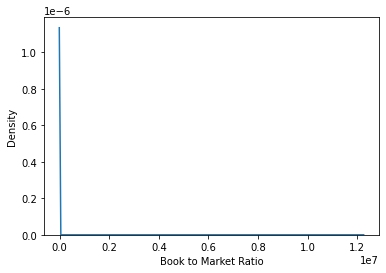

In [644]:
sns.kdeplot(x="Book to Market Ratio",data=US_Firms)

**RESPUESTA.**

>###### Realice trazados para visualizar la posible relación que cada factor podría tener con la variable dependiente.

In [645]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].corr(method='pearson')

,F1_ret,EPSP,Sales Annual G,Book to Market Ratio
F1_ret,1.000,-0.013,0.001,-0.013
EPSP,-0.013,1.000,-0.000,-0.987
Sales Annual G,0.001,-0.000,1.000,-0.000
Book to Market Ratio,-0.013,-0.987,-0.000,1.000


>###### Mostrar estadísticas descriptivas de estos factores.

In [646]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].corr(method='pearson').describe()

,F1_ret,EPSP,Sales Annual G,Book to Market Ratio
count,4.000,4.000,4.000,4.000
mean,0.244,0.000,0.250,0.000
std,0.504,0.811,0.500,0.811
min,-0.013,-0.987,-0.000,-0.987
25%,-0.013,-0.256,-0.000,-0.257
50%,-0.006,-0.006,0.001,-0.007
75%,0.251,0.250,0.251,0.250
max,1.000,1.000,1.000,1.000


---

Diseñe y ejecute un modelo de regresión múltiple para examinar si los factores seleccionados y las ganancias por acción deflactadas por precio pueden explicar/predecir las ganancias anuales de las acciones. 

Usted tiene que controlar para la industria y el tamaño de la firma. Para controlar estas variables, debe incluirlas como variables independientes adicionales en el modelo.

>###### Las variables independientes deben estar en la escala correcta para poder comparar los valores de las variables entre diferentes firmas de cualquier tamaño.

>###### Para cada variable independiente debe comprobar si hay valores atípicos y realizar los ajustes correspondientes para evitar resultados no fiables en el modelo de regresión.

>###### Debe comprobar si existen posibles problemas de multicolinealidad. Explique brevemente qué es multicolinealidad, ejecute e interprete la prueba correspondiente.

>###### Interpretar el modelo. Interpretar los resultados de cada coeficiente (beta y su significación estadística). Interpretar el R-cuadrado del modelo.

**RESPUESTA.**

>###### Ajustes a su modelo. Si hay una o más variables independientes (factores o variables de control) que no son significativas, elimínelas del modelo. Usted tiene que ejecutar e interpretar su modelo final.

**RESPUESTA.**

In [647]:
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [648]:
winsorize(US_Firms["F1_ret"], limits=[0.1, 0.55], inplace=True,nan_policy='propagate')
winsorize(US_Firms["EPSP"], limits=[0.1, 0.53], inplace=True,nan_policy='propagate')
winsorize(US_Firms["Sales Annual G"], limits=[0.1, 0.57], inplace=True,nan_policy='propagate')
winsorize(US_Firms["Book to Market Ratio"], limits=[0.1, 0.53], inplace=True,nan_policy='propagate')

masked_array(data=[0.37618763, 0.48321566, 0.42599138, ..., 0.4340675 ,
                   0.27773814, 4.65341297],
             mask=False,
       fill_value=1e+20)

In [649]:
# Verificar valores nulos 
print(US_Firms["F1_ret"].isnull().sum())
print(US_Firms["EPSP"].isnull().sum())
print(US_Firms["Sales Annual G"].isnull().sum())
print(US_Firms["Book to Market Ratio"].isnull().sum())

0
0
0
0


<AxesSubplot:xlabel='Sales Annual G'>

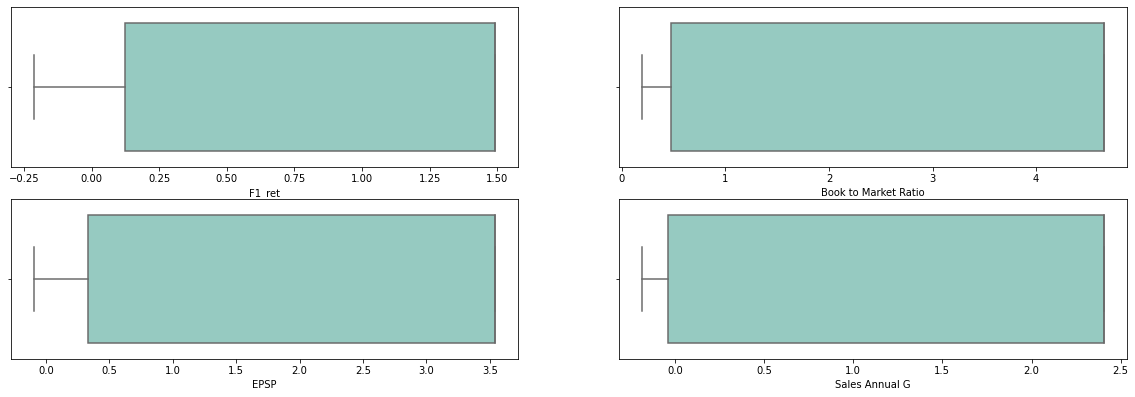

In [650]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
sns.boxplot(x="F1_ret",data=US_Firms,palette='Set3',ax=ax1)
sns.boxplot(x="Book to Market Ratio",data=US_Firms,palette='Set3',ax=ax2)
sns.boxplot(x="EPSP",data=US_Firms,palette='Set3',ax=ax3)
sns.boxplot(x="Sales Annual G",data=US_Firms, palette='Set3',ax=ax4)


In [651]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].describe()

,F1_ret,EPSP,Sales Annual G,Book to Market Ratio
count,323816.000,323816.000,323816.000,323816.000
mean,0.874,2.103,1.366,2.740
std,0.713,1.592,1.207,2.058
min,-0.215,-0.097,-0.182,0.198
25%,0.124,0.328,-0.039,0.476
50%,1.492,3.540,2.404,4.653
75%,1.492,3.540,2.404,4.653
max,1.492,3.540,2.404,4.653


In [652]:
US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]].corr(method='pearson')

,F1_ret,EPSP,Sales Annual G,Book to Market Ratio
F1_ret,1.000,0.808,0.770,0.865
EPSP,0.808,1.000,0.807,0.895
Sales Annual G,0.770,0.807,1.000,0.833
Book to Market Ratio,0.865,0.895,0.833,1.000


In [653]:
vif = US_Firms[["F1_ret","EPSP","Sales Annual G","Book to Market Ratio"]]

vifData = pd.DataFrame()
np.any(~np.isfinite(vifData),axis=0)
vifData["feature"] = vif.columns

vifData["VIF"] = [variance_inflation_factor(vif.values, i) for i in range(len(vif.columns))]

vifData



,feature,VIF
0,F1_ret,10.359
1,EPSP,14.478
2,Sales Annual G,8.094
3,Book to Market Ratio,21.224


In [654]:
# Getting x and y parameters for the model prediction
x = US_Firms[["EPSP","Sales Annual G","Book to Market Ratio"]]
y = US_Firms['F1_ret']

# Getting information to interpret a model
x = sm.add_constant(x)
results = sm.OLS(y, x, missing="drop").fit()
pred = results.predict(x)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 F1_ret   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 3.410e+05
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:15:02   Log-Likelihood:            -1.1935e+05
No. Observations:              323816   AIC:                         2.387e+05
Df Residuals:                  323812   BIC:                         2.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0384 

In [655]:
# Getting x and y parameters for the model prediction
x = US_Firms[["EPSP","Sales Annual G","Book to Market Ratio"]]
y = US_Firms['F1_ret']

# Getting information to interpret a model
x = sm.add_constant(x)
results = sm.OLS(y, x, missing="drop").fit()
pred = results.predict(x)

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 F1_ret   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 3.410e+05
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:15:03   Log-Likelihood:            -1.1935e+05
No. Observations:              323816   AIC:                         2.387e+05
Df Residuals:                  323812   BIC:                         2.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0384 